In [ ]:
#LSTM
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load molecular descriptor data
def load_descriptor_data(file_path):
    data = pd.read_csv(file_path)
    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())
    # Assuming 'pIC50' is the target column
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']
    return X, y

# Normalize data
def normalize_data(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Create sequences for LSTM
def create_sequences(data, labels, sequence_length=60):
    sequences = []
    seq_labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])  # Create sequences
        seq_labels.append(labels[i+sequence_length])  # Corresponding labels
    return np.array(sequences), np.array(seq_labels)

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with actual path
    X, y = load_descriptor_data(file_path)

    # Normalize features
    X_scaled, scaler = normalize_data(X)

    # Create sequences
    sequence_length = 60
    X_seq, y_seq = create_sequences(X_scaled, y.values, sequence_length)

    # Check the shape before passing to the model
    print(f"Shape of X_seq: {X_seq.shape}, Shape of y_seq: {y_seq.shape}")

    # Reshape X_seq to (batch_size, sequence_length, features) as expected by LSTM
    X_seq = X_seq.reshape(X_seq.shape[0], X_seq.shape[1], X_seq.shape[2])

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build model
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse:.4f}, R2: {r2:.4f}')

    # Save the model
    model.save('ic50_prediction_model.h5')

if __name__ == "__main__":
    main()


Shape of X_seq: (2106, 60, 489), Shape of y_seq: (2106,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - loss: 0.0920 - mae: 0.2374 - val_loss: 0.0278 - val_mae: 0.1384
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - loss: 0.0335 - mae: 0.1492 - val_loss: 0.0182 - val_mae: 0.0988
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - loss: 0.0228 - mae: 0.1185 - val_loss: 0.0190 - val_mae: 0.1097
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0216 - mae: 0.1116 - val_loss: 0.0165 - val_mae: 0.0926
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - loss: 0.0204 - mae: 0.1103 - val_loss: 0.0184 - val_mae: 0.0968
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - loss: 0.0225 - mae: 0.1158 - val_loss: 0.0164 - val_mae: 0.0951
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - loss: 0.0188 - mae: 0.1033 - val_loss: 0.0162 - val_mae: 0.0965
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - loss: 0.0191 - mae: 0.1042 - val_loss: 0.0231 - val_mae: 0.1112
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/ste

MSE: 0.0087, R2: 0.7460


In [ ]:
from joblib import dump
import pandas as pd

# Assuming 'load_descriptor_data' is defined in the previous cell
def load_descriptor_data(file_path):
    data = pd.read_csv(file_path)
    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())
    # Assuming 'pIC50' is the target column
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']
    return X, y


file_path = '/content/NEW_TRAINING.csv'  # Replace with actual path
X, y = load_descriptor_data(file_path) # This line loads X

# Normalize features and save the scaler
X_scaled, scaler = normalize_data(X)
dump(scaler, 'scaler.pkl')  # Save the scaler to 'scaler.pkl' in the current directory


['scaler.pkl']

In [ ]:
#RNN
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load molecular descriptor data
def load_descriptor_data(file_path):
    data = pd.read_csv(file_path)
    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())
    # Assuming 'pIC50' is the target column
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']
    return X, y

# Normalize data
def normalize_data(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Create sequences for RNN
def create_sequences(data, labels, sequence_length=60):
    sequences = []
    seq_labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        seq_labels.append(labels[i+sequence_length])
    return np.array(sequences), np.array(seq_labels)

# Build RNN model
def build_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        SimpleRNN(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with actual path
    X, y = load_descriptor_data(file_path)

    # Normalize features
    X_scaled, scaler = normalize_data(X)

    # Create sequences
    sequence_length = 60
    X_seq, y_seq = create_sequences(X_scaled, y.values, sequence_length)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build model
    model = build_rnn_model((X_train.shape[1], X_train.shape[2]))

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse:.4f}, R2: {r2:.4f}')

    # Save the model
    model.save('ic50_prediction_rnn_model.h5')

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.1993 - mae: 0.3304 - val_loss: 0.0596 - val_mae: 0.1927
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0758 - mae: 0.2230 - val_loss: 0.0607 - val_mae: 0.1947
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0612 - mae: 0.1999 - val_loss: 0.0311 - val_mae: 0.1500
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0538 - mae: 0.1901 - val_loss: 0.0290 - val_mae: 0.1416
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0451 - mae: 0.1739 - val_loss: 0.0294 - val_mae: 0.1395
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0429 - mae: 0.1716 - val_loss: 0.0258 - val_mae: 0.1306
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0405 - mae: 0.1617 - val_loss: 0.0293 - val_mae: 0.1469
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0354 - mae: 0.1522 - val_loss: 0.0223 - val_mae: 0.1206
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.031

MSE: 0.0195, R2: 0.4315


In [ ]:
#GRU
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load molecular descriptor data
def load_descriptor_data(file_path):
    data = pd.read_csv(file_path)
    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())
    # Assuming 'pIC50' is the target column
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']
    return X, y

# Normalize data
def normalize_data(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Create sequences for GRU
def create_sequences(data, labels, sequence_length=60):
    sequences = []
    seq_labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        seq_labels.append(labels[i+sequence_length])
    return np.array(sequences), np.array(seq_labels)

# Build GRU model
def build_gru_model(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with actual path
    X, y = load_descriptor_data(file_path)

    # Normalize features
    X_scaled, scaler = normalize_data(X)

    # Create sequences
    sequence_length = 60
    X_seq, y_seq = create_sequences(X_scaled, y.values, sequence_length)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build model
    model = build_gru_model((X_train.shape[1], X_train.shape[2]))

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse:.4f}, R2: {r2:.4f}')

    # Save the model
    model.save('ic50_prediction_gru_model.h5')

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - loss: 0.1857 - mae: 0.3194 - val_loss: 0.0573 - val_mae: 0.2053
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 0.0548 - mae: 0.1882 - val_loss: 0.0439 - val_mae: 0.1843
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - loss: 0.0415 - mae: 0.1586 - val_loss: 0.0205 - val_mae: 0.1138
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 0.0333 - mae: 0.1438 - val_loss: 0.0181 - val_mae: 0.1020
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0242 - mae: 0.1220 - val_loss: 0.0262 - val_mae: 0.1272
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - loss: 0.0271 - mae: 0.1281 - val_loss: 0.0187 - val_mae: 0.1003
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 0.0204 - mae: 0.1106 - val_loss: 0.0141 - val_mae: 0.0865
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0181 - mae: 0.1015 - val_loss: 0.0171 - val_mae: 0.1039
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step

MSE: 0.0042, R2: 0.8773


In [ ]:
#BiLSTM
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load molecular descriptor data
def load_descriptor_data(file_path):
    data = pd.read_csv(file_path)
    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())
    # Assuming 'pIC50' is the target column
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']
    return X, y

# Normalize data
def normalize_data(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Create sequences for BiLSTM
def create_sequences(data, labels, sequence_length=60):
    sequences = []
    seq_labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        seq_labels.append(labels[i+sequence_length])
    return np.array(sequences), np.array(seq_labels)

# Build BiLSTM model
def build_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(64)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with actual path
    X, y = load_descriptor_data(file_path)

    # Normalize features
    X_scaled, scaler = normalize_data(X)

    # Create sequences
    sequence_length = 60
    X_seq, y_seq = create_sequences(X_scaled, y.values, sequence_length)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build model
    model = build_bilstm_model((X_train.shape[1], X_train.shape[2]))

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse:.4f}, R2: {r2:.4f}')

    # Save the model
    model.save('ic50_prediction_bilstm_model.h5')

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 33s 600ms/step - loss: 0.1237 - mae: 0.2503 - val_loss: 0.0308 - val_mae: 0.1484
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 521ms/step - loss: 0.0340 - mae: 0.1533 - val_loss: 0.0289 - val_mae: 0.1421
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - loss: 0.0350 - mae: 0.1544 - val_loss: 0.0316 - val_mae: 0.1527
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 28s 548ms/step - loss: 0.0326 - mae: 0.1506 - val_loss: 0.0174 - val_mae: 0.0932
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 34s 392ms/step - loss: 0.0249 - mae: 0.1225 - val_loss: 0.0170 - val_mae: 0.0957
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - loss: 0.0215 - mae: 0.1114 - val_loss: 0.0223 - val_mae: 0.1248
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 369ms/step - loss: 0.0225 - mae: 0.1184 - val_loss: 0.0188 - val_mae: 0.1068
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 401ms/step - loss: 0.0204 - mae: 0.1101 - val_loss: 0.0193 - val_mae: 0.1128
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 391ms/

MSE: 0.0049, R2: 0.8580


In [ ]:
#CNN
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load molecular descriptor data
def load_descriptor_data(file_path):
    data = pd.read_csv(file_path)
    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())
    # Assuming 'pIC50' is the target column
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']
    return X, y

# Normalize data
def normalize_data(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Create sequences for CNN
def create_sequences(data, labels, sequence_length=60):
    sequences = []
    seq_labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        seq_labels.append(labels[i+sequence_length])
    return np.array(sequences), np.array(seq_labels)

# Build CNN model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with your actual dataset path
    X, y = load_descriptor_data(file_path)

    # Normalize features
    X_scaled, scaler = normalize_data(X)

    # Create sequences
    sequence_length = 60
    X_seq, y_seq = create_sequences(X_scaled, y.values, sequence_length)

    # Reshape for CNN (adjust the last dimension to match the number of features)
    X_seq = X_seq.reshape(X_seq.shape[0], X_seq.shape[1], X_scaled.shape[1])
    #X_scaled.shape[1] provides the correct number of features (122 in this case)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build model
    model = build_cnn_model((X_train.shape[1], X_train.shape[2]))

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse:.4f}, R2: {r2:.4f}')

    # Save the model
    model.save('ic50_prediction_cnn_model.h5')

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2758 - mae: 0.3498 - val_loss: 0.0578 - val_mae: 0.1890
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0471 - mae: 0.1766 - val_loss: 0.0745 - val_mae: 0.2264
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0467 - mae: 0.1731 - val_loss: 0.0538 - val_mae: 0.1861
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0439 - mae: 0.1617 - val_loss: 0.0315 - val_mae: 0.1351
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0281 - mae: 0.1269 - val_loss: 0.0653 - val_mae: 0.2221
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0380 - mae: 0.1520 - val_loss: 0.0497 - val_mae: 0.1854
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0326 - mae: 0.1398 - val_loss: 0.0261 - val_mae: 0.1225
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0256 - mae: 0.1226 - val_loss: 0.0345 - val_mae: 0.1446
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.025

MSE: 0.0197, R2: 0.4263


In [ ]:
def cross_validate_model(model_fn, X, y, n_splits=5, epochs=50, batch_size=32):
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error, r2_score
    from keras.callbacks import EarlyStopping

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold = 1
    results = {'mse': [], 'r2': []}

    for train_idx, val_idx in kfold.split(X):
        print(f"\nTraining fold {fold}/{n_splits}...")

        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Build model
        model = model_fn((X_train.shape[1], X_train.shape[2]))  # Input shape from sequence data

        # Early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        # Evaluate model
        y_val_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)

        print(f"Fold {fold}: MSE={mse:.4f}, R2={r2:.4f}")
        results['mse'].append(mse)
        results['r2'].append(r2)

        fold += 1

    # Aggregate results
    print("\nCross-validation results:")
    print(f"Mean MSE: {np.mean(results['mse']):.4f}, Std MSE: {np.std(results['mse']):.4f}")
    print(f"Mean R2: {np.mean(results['r2']):.4f}, Std R2: {np.std(results['r2']):.4f}")

    return results
def main():
    file_path = '/content/new_preprocessed_dataset.csv'  # Replace with actual path
    X, y = load_descriptor_data(file_path)

    # Normalize features
    X_scaled, scaler = normalize_data(X)

    # Create sequences of data for LSTM, BiLSTM, GRU, CNN models
    sequence_length = 60
    X_seq, y_seq = create_sequences(X_scaled, y.values, sequence_length)

    # Perform cross-validation for each model
    models = [create_lstm_model, create_bilstm_model, create_gru_model, create_cnn_model]

    for model_fn in models:
        print(f"Evaluating {model_fn.__name__}...")
        cross_validate_model(model_fn, X_seq, y_seq, n_splits=5, epochs=50, batch_size=32)

if __name__ == "__main__":
    main()


Evaluating create_lstm_model...

Training fold 1/5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - loss: 0.0725 - mae: 0.2119 - val_loss: 0.0292 - val_mae: 0.1452
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - loss: 0.0328 - mae: 0.1431 - val_loss: 0.0171 - val_mae: 0.0979
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0219 - mae: 0.1145 - val_loss: 0.0220 - val_mae: 0.1119
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0241 - mae: 0.1197 - val_loss: 0.0241 - val_mae: 0.1198
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.0188 - mae: 0.1032 - val_loss: 0.0150 - val_mae: 0.0945
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - loss: 0.0171 - mae: 0.0997 - val_loss: 0.0161 - val_mae: 0.0909
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - loss: 0.0205 - mae: 0.1110 - val_loss: 0.0175 - val_mae: 0.0969
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0182 - mae: 0.1029 - val_loss: 0.0149 - val_mae: 0.0868
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - loss: 0.0819 - mae: 0.2237 - val_loss: 0.0466 - val_mae: 0.1730
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 0.0295 - mae: 0.1391 - val_loss: 0.0155 - val_mae: 0.0935
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 0.0245 - mae: 0.1199 - val_loss: 0.0289 - val_mae: 0.1329
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0219 - mae: 0.1142 - val_loss: 0.0175 - val_mae: 0.0980
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0178 - mae: 0.1007 - val_loss: 0.0267 - val_mae: 0.1256
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0197 - mae: 0.1080 - val_loss: 0.0158 - val_mae: 0.0983
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 0.0176 - mae: 0.1019 - val_loss: 0.0318 - val_mae: 0.1438
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0167 - mae: 0.0959 - val_loss: 0.0199 - val_mae: 0.1013
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - loss: 0.0596 - mae: 0.1924 - val_loss: 0.0308 - val_mae: 0.1488
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0306 - mae: 0.1422 - val_loss: 0.0183 - val_mae: 0.0974
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0216 - mae: 0.1117 - val_loss: 0.0209 - val_mae: 0.1106
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 0.0241 - mae: 0.1187 - val_loss: 0.0167 - val_mae: 0.0980
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0186 - mae: 0.1053 - val_loss: 0.0185 - val_mae: 0.1004
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 0.0184 - mae: 0.1029 - val_loss: 0.0172 - val_mae: 0.0955
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 0.0179 - mae: 0.1026 - val_loss: 0.0198 - val_mae: 0.1037
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0213 - mae: 0.1104 - val_loss: 0.0176 - val_mae: 0.0992
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0972 - mae: 0.2306 - val_loss: 0.0276 - val_mae: 0.1395
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.0294 - mae: 0.1365 - val_loss: 0.0207 - val_mae: 0.1147
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0249 - mae: 0.1229 - val_loss: 0.0196 - val_mae: 0.0982
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0213 - mae: 0.1114 - val_loss: 0.0227 - val_mae: 0.1097
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0207 - mae: 0.1089 - val_loss: 0.0160 - val_mae: 0.0996
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0184 - mae: 0.1014 - val_loss: 0.0157 - val_mae: 0.0974
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.0194 - mae: 0.1052 - val_loss: 0.0135 - val_mae: 0.0859
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 0.0209 - mae: 0.1100 - val_loss: 0.0222 - val_mae: 0.1087
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0901 - mae: 0.2320 - val_loss: 0.0237 - val_mae: 0.1241
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0316 - mae: 0.1399 - val_loss: 0.0201 - val_mae: 0.1081
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 0.0265 - mae: 0.1247 - val_loss: 0.0178 - val_mae: 0.0940
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0240 - mae: 0.1171 - val_loss: 0.0182 - val_mae: 0.0964
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.0252 - mae: 0.1221 - val_loss: 0.0207 - val_mae: 0.1194
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0227 - mae: 0.1155 - val_loss: 0.0186 - val_mae: 0.1122
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0193 - mae: 0.1054 - val_loss: 0.0144 - val_mae: 0.0868
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.0199 - mae: 0.1071 - val_loss: 0.0160 - val_mae: 0.0874
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 358ms/step - loss: 0.1276 - mae: 0.2684 - val_loss: 0.0332 - val_mae: 0.1565
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 353ms/step - loss: 0.0379 - mae: 0.1619 - val_loss: 0.0297 - val_mae: 0.1390
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 346ms/step - loss: 0.0276 - mae: 0.1336 - val_loss: 0.0193 - val_mae: 0.1090
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 390ms/step - loss: 0.0234 - mae: 0.1163 - val_loss: 0.0234 - val_mae: 0.1117
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 384ms/step - loss: 0.0228 - mae: 0.1144 - val_loss: 0.0246 - val_mae: 0.1301
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - loss: 0.0212 - mae: 0.1137 - val_loss: 0.0197 - val_mae: 0.1117
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 388ms/step - loss: 0.0187 - mae: 0.1052 - val_loss: 0.0176 - val_mae: 0.0949
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 384ms/step - loss: 0.0182 - mae: 0.1006 - val_loss: 0.0162 - val_mae: 0.0938
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 345ms/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 388ms/step - loss: 0.1189 - mae: 0.2537 - val_loss: 0.0241 - val_mae: 0.1299
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 341ms/step - loss: 0.0290 - mae: 0.1345 - val_loss: 0.0189 - val_mae: 0.0951
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 380ms/step - loss: 0.0219 - mae: 0.1104 - val_loss: 0.0209 - val_mae: 0.1080
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 341ms/step - loss: 0.0209 - mae: 0.1087 - val_loss: 0.0270 - val_mae: 0.1246
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 368ms/step - loss: 0.0189 - mae: 0.1019 - val_loss: 0.0143 - val_mae: 0.0881
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - loss: 0.0161 - mae: 0.0947 - val_loss: 0.0133 - val_mae: 0.0803
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 350ms/step - loss: 0.0173 - mae: 0.1001 - val_loss: 0.0180 - val_mae: 0.1145
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 340ms/step - loss: 0.0158 - mae: 0.0960 - val_loss: 0.0119 - val_mae: 0.0785
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 349ms/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 365ms/step - loss: 0.0916 - mae: 0.2262 - val_loss: 0.0342 - val_mae: 0.1578
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 349ms/step - loss: 0.0303 - mae: 0.1408 - val_loss: 0.0319 - val_mae: 0.1362
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 358ms/step - loss: 0.0253 - mae: 0.1204 - val_loss: 0.0181 - val_mae: 0.0981
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - loss: 0.0191 - mae: 0.1025 - val_loss: 0.0208 - val_mae: 0.1038
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 374ms/step - loss: 0.0195 - mae: 0.1036 - val_loss: 0.0149 - val_mae: 0.0896
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 352ms/step - loss: 0.0168 - mae: 0.0968 - val_loss: 0.0136 - val_mae: 0.0842
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 378ms/step - loss: 0.0144 - mae: 0.0895 - val_loss: 0.0141 - val_mae: 0.0844
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 353ms/step - loss: 0.0144 - mae: 0.0899 - val_loss: 0.0169 - val_mae: 0.0998
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 355ms/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 396ms/step - loss: 0.1005 - mae: 0.2437 - val_loss: 0.0289 - val_mae: 0.1415
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 388ms/step - loss: 0.0308 - mae: 0.1441 - val_loss: 0.0209 - val_mae: 0.1030
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 388ms/step - loss: 0.0245 - mae: 0.1200 - val_loss: 0.0161 - val_mae: 0.0943
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 377ms/step - loss: 0.0187 - mae: 0.1040 - val_loss: 0.0167 - val_mae: 0.1026
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 347ms/step - loss: 0.0188 - mae: 0.1043 - val_loss: 0.0158 - val_mae: 0.0875
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 385ms/step - loss: 0.0197 - mae: 0.1071 - val_loss: 0.0146 - val_mae: 0.0858
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 351ms/step - loss: 0.0156 - mae: 0.0939 - val_loss: 0.0132 - val_mae: 0.0815
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 350ms/step - loss: 0.0153 - mae: 0.0930 - val_loss: 0.0138 - val_mae: 0.0820
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 379ms/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 25s 362ms/step - loss: 0.1446 - mae: 0.2496 - val_loss: 0.0313 - val_mae: 0.1425
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 381ms/step - loss: 0.0337 - mae: 0.1505 - val_loss: 0.0228 - val_mae: 0.1250
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 342ms/step - loss: 0.0268 - mae: 0.1264 - val_loss: 0.0199 - val_mae: 0.1069
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 376ms/step - loss: 0.0232 - mae: 0.1157 - val_loss: 0.0200 - val_mae: 0.1144
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - loss: 0.0203 - mae: 0.1065 - val_loss: 0.0150 - val_mae: 0.0863
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 347ms/step - loss: 0.0178 - mae: 0.0999 - val_loss: 0.0167 - val_mae: 0.0883
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 382ms/step - loss: 0.0160 - mae: 0.0937 - val_loss: 0.0128 - val_mae: 0.0834
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - loss: 0.0157 - mae: 0.0941 - val_loss: 0.0146 - val_mae: 0.0934
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 352ms/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step - loss: 0.1534 - mae: 0.2947 - val_loss: 0.0328 - val_mae: 0.1435
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0362 - mae: 0.1545 - val_loss: 0.0244 - val_mae: 0.1188
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0288 - mae: 0.1336 - val_loss: 0.0190 - val_mae: 0.0993
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - loss: 0.0228 - mae: 0.1167 - val_loss: 0.0174 - val_mae: 0.0954
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 0.0225 - mae: 0.1159 - val_loss: 0.0208 - val_mae: 0.1052
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0221 - mae: 0.1131 - val_loss: 0.0288 - val_mae: 0.1321
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0222 - mae: 0.1149 - val_loss: 0.0160 - val_mae: 0.0870
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0191 - mae: 0.1050 - val_loss: 0.0178 - val_mae: 0.0926
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - loss: 0.0891 - mae: 0.2285 - val_loss: 0.0217 - val_mae: 0.1196
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0321 - mae: 0.1420 - val_loss: 0.0279 - val_mae: 0.1312
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0255 - mae: 0.1220 - val_loss: 0.0190 - val_mae: 0.1008
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0221 - mae: 0.1113 - val_loss: 0.0148 - val_mae: 0.0923
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.0188 - mae: 0.1030 - val_loss: 0.0138 - val_mae: 0.0825
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0178 - mae: 0.1007 - val_loss: 0.0137 - val_mae: 0.0866
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0190 - mae: 0.1035 - val_loss: 0.0136 - val_mae: 0.0804
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0166 - mae: 0.0962 - val_loss: 0.0181 - val_mae: 0.0939
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.1264 - mae: 0.2645 - val_loss: 0.0295 - val_mae: 0.1420
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - loss: 0.0315 - mae: 0.1396 - val_loss: 0.0180 - val_mae: 0.0923
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0255 - mae: 0.1231 - val_loss: 0.0164 - val_mae: 0.0872
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0195 - mae: 0.1029 - val_loss: 0.0211 - val_mae: 0.1058
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 0.0186 - mae: 0.1040 - val_loss: 0.0187 - val_mae: 0.0961
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 0.0195 - mae: 0.1061 - val_loss: 0.0144 - val_mae: 0.0877
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0181 - mae: 0.1028 - val_loss: 0.0233 - val_mae: 0.1174
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0179 - mae: 0.1001 - val_loss: 0.0131 - val_mae: 0.0803
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 0.1286 - mae: 0.2733 - val_loss: 0.0226 - val_mae: 0.1183
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0377 - mae: 0.1531 - val_loss: 0.0320 - val_mae: 0.1377
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - loss: 0.0325 - mae: 0.1431 - val_loss: 0.0300 - val_mae: 0.1333
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 0.0284 - mae: 0.1284 - val_loss: 0.0162 - val_mae: 0.0848
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0206 - mae: 0.1087 - val_loss: 0.0217 - val_mae: 0.1079
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0219 - mae: 0.1122 - val_loss: 0.0141 - val_mae: 0.0832
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 0.0206 - mae: 0.1090 - val_loss: 0.0146 - val_mae: 0.0827
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0180 - mae: 0.1010 - val_loss: 0.0128 - val_mae: 0.0842
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - loss: 0.1504 - mae: 0.2850 - val_loss: 0.0251 - val_mae: 0.1324
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 0.0371 - mae: 0.1514 - val_loss: 0.0196 - val_mae: 0.1113
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - loss: 0.0254 - mae: 0.1239 - val_loss: 0.0163 - val_mae: 0.0908
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 0.0266 - mae: 0.1237 - val_loss: 0.0145 - val_mae: 0.0857
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0216 - mae: 0.1110 - val_loss: 0.0170 - val_mae: 0.1057
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0206 - mae: 0.1103 - val_loss: 0.0138 - val_mae: 0.0875
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0186 - mae: 0.1028 - val_loss: 0.0139 - val_mae: 0.0794
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0170 - mae: 0.0986 - val_loss: 0.0143 - val_mae: 0.0806
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1552 - mae: 0.2793 - val_loss: 0.0251 - val_mae: 0.1203
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0339 - mae: 0.1449 - val_loss: 0.0170 - val_mae: 0.0919
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0241 - mae: 0.1180 - val_loss: 0.0156 - val_mae: 0.0928
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0248 - mae: 0.1221 - val_loss: 0.0255 - val_mae: 0.1207
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0188 - mae: 0.1032 - val_loss: 0.0204 - val_mae: 0.1032
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0168 - mae: 0.0972 - val_loss: 0.0186 - val_mae: 0.0981
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0179 - mae: 0.1031 - val_loss: 0.0181 - val_mae: 0.0974
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0138 - mae: 0.0872 - val_loss: 0.0263 - val_mae: 0.1280
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.017

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1272 - mae: 0.2602 - val_loss: 0.0364 - val_mae: 0.1519
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0279 - mae: 0.1313 - val_loss: 0.0325 - val_mae: 0.1380
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0252 - mae: 0.1249 - val_loss: 0.0498 - val_mae: 0.1815
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0209 - mae: 0.1094 - val_loss: 0.0431 - val_mae: 0.1650
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0199 - mae: 0.1047 - val_loss: 0.0474 - val_mae: 0.1750
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0176 - mae: 0.0972 - val_loss: 0.0394 - val_mae: 0.1590
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mae: 0.0939 - val_loss: 0.0426 - val_mae: 0.1686
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0145 - mae: 0.0886 - val_loss: 0.0258 - val_mae: 0.1234
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.015

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1153 - mae: 0.2427 - val_loss: 0.0345 - val_mae: 0.1459
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0313 - mae: 0.1424 - val_loss: 0.0271 - val_mae: 0.1223
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0231 - mae: 0.1163 - val_loss: 0.0339 - val_mae: 0.1423
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0200 - mae: 0.1054 - val_loss: 0.0257 - val_mae: 0.1188
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0179 - mae: 0.1010 - val_loss: 0.0283 - val_mae: 0.1280
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0174 - mae: 0.0996 - val_loss: 0.0289 - val_mae: 0.1272
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0150 - mae: 0.0912 - val_loss: 0.0342 - val_mae: 0.1474
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0145 - mae: 0.0895 - val_loss: 0.0283 - val_mae: 0.1324
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.014

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1084 - mae: 0.2474 - val_loss: 0.0234 - val_mae: 0.1133
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0272 - mae: 0.1260 - val_loss: 0.0287 - val_mae: 0.1298
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0232 - mae: 0.1119 - val_loss: 0.0255 - val_mae: 0.1197
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0162 - mae: 0.0928 - val_loss: 0.0539 - val_mae: 0.1956
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0221 - mae: 0.1142 - val_loss: 0.0173 - val_mae: 0.0963
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0152 - mae: 0.0924 - val_loss: 0.0247 - val_mae: 0.1234
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0130 - mae: 0.0845 - val_loss: 0.0184 - val_mae: 0.1024
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0127 - mae: 0.0835 - val_loss: 0.0194 - val_mae: 0.1035
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.011

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0618 - mae: 0.1968 - val_loss: 0.0186 - val_mae: 0.1045
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0294 - mae: 0.1346 - val_loss: 0.0467 - val_mae: 0.1720
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0255 - mae: 0.1207 - val_loss: 0.0233 - val_mae: 0.1120
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0181 - mae: 0.0988 - val_loss: 0.0181 - val_mae: 0.0946
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0200 - mae: 0.1065 - val_loss: 0.0278 - val_mae: 0.1285
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0148 - mae: 0.0885 - val_loss: 0.0259 - val_mae: 0.1226
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0148 - mae: 0.0902 - val_loss: 0.0283 - val_mae: 0.1271
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0150 - mae: 0.0929 - val_loss: 0.0220 - val_mae: 0.1082
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.013

Data Shape: X=(2106, 60, 489), y=(2106,)
Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - loss: 0.0888 - mae: 0.2287 - val_loss: 0.0210 - val_mae: 0.1324
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - loss: 0.0333 - mae: 0.1461 - val_loss: 0.0150 - val_mae: 0.0844
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - loss: 0.0293 - mae: 0.1333 - val_loss: 0.0241 - val_mae: 0.1117
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - loss: 0.0218 - mae: 0.1157 - val_loss: 0.0291 - val_mae: 0.1287
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - loss: 0.0209 - mae: 0.1134 - val_loss: 0.0339 - val_mae: 0.1392
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - loss: 0.0181 - mae: 0.1052 - val_loss: 0.0317 - val_mae: 0.1347
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 0.0169 - mae: 0.0992 - val_loss: 0.0378 - val_mae: 0.1582
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0173 - mae: 0.1020 - val_loss: 0.0397 - val_mae: 0.1626
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - loss: 0.1298 - mae: 0.2567 - val_loss: 0.0773 - val_mae: 0.2739
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - loss: 0.0381 - mae: 0.1560 - val_loss: 0.0165 - val_mae: 0.1136
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - loss: 0.0419 - mae: 0.1637 - val_loss: 0.0248 - val_mae: 0.1448
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - loss: 0.0296 - mae: 0.1366 - val_loss: 0.0143 - val_mae: 0.0802
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 0.0307 - mae: 0.1394 - val_loss: 0.0264 - val_mae: 0.1216
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - loss: 0.0206 - mae: 0.1071 - val_loss: 0.0190 - val_mae: 0.1007
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - loss: 0.0222 - mae: 0.1125 - val_loss: 0.0320 - val_mae: 0.1402
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - loss: 0.0193 - mae: 0.1050 - val_loss: 0.0292 - val_mae: 0.1296
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - loss: 0.0925 - mae: 0.2312 - val_loss: 0.0262 - val_mae: 0.1562
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - loss: 0.0371 - mae: 0.1568 - val_loss: 0.0326 - val_mae: 0.1764
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - loss: 0.0346 - mae: 0.1506 - val_loss: 0.0304 - val_mae: 0.1698
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - loss: 0.0315 - mae: 0.1428 - val_loss: 0.0506 - val_mae: 0.2197
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - loss: 0.0272 - mae: 0.1283 - val_loss: 0.0350 - val_mae: 0.1606
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0229 - mae: 0.1182 - val_loss: 0.0249 - val_mae: 0.1181
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - loss: 0.0194 - mae: 0.1074 - val_loss: 0.0261 - val_mae: 0.1231
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 0.0177 - mae: 0.1021 - val_loss: 0.0330 - val_mae: 0.1341
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - loss: 0.1011 - mae: 0.2441 - val_loss: 0.0511 - val_mae: 0.2242
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - loss: 0.0411 - mae: 0.1661 - val_loss: 0.0393 - val_mae: 0.1959
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - loss: 0.0321 - mae: 0.1421 - val_loss: 0.0381 - val_mae: 0.1904
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - loss: 0.0322 - mae: 0.1453 - val_loss: 0.0194 - val_mae: 0.1274
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 0.0303 - mae: 0.1384 - val_loss: 0.0281 - val_mae: 0.1553
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - loss: 0.0281 - mae: 0.1301 - val_loss: 0.0379 - val_mae: 0.1764
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - loss: 0.0227 - mae: 0.1151 - val_loss: 0.0174 - val_mae: 0.1045
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - loss: 0.0275 - mae: 0.1309 - val_loss: 0.0472 - val_mae: 0.2016
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - loss: 0.0767 - mae: 0.2038 - val_loss: 0.0305 - val_mae: 0.1463
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - loss: 0.0319 - mae: 0.1409 - val_loss: 0.0156 - val_mae: 0.0817
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - loss: 0.0281 - mae: 0.1302 - val_loss: 0.0190 - val_mae: 0.1112
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 0.0223 - mae: 0.1187 - val_loss: 0.0212 - val_mae: 0.1207
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0248 - mae: 0.1235 - val_loss: 0.0225 - val_mae: 0.1028
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 0.0198 - mae: 0.1064 - val_loss: 0.0255 - val_mae: 0.1192
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0149 - mae: 0.0929 - val_loss: 0.0397 - val_mae: 0.1672
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - loss: 0.0173 - mae: 0.1020 - val_loss: 0.0405 - val_mae: 0.1668
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/ste

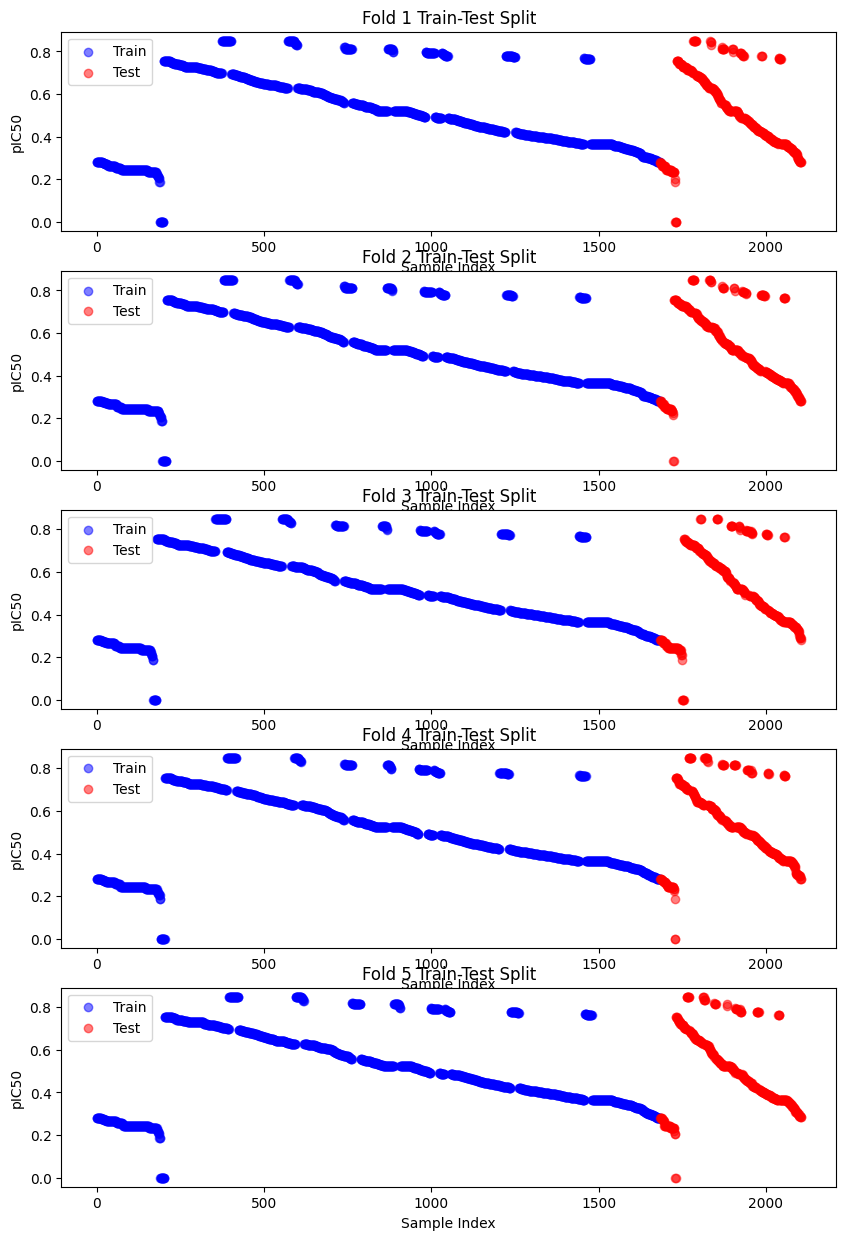

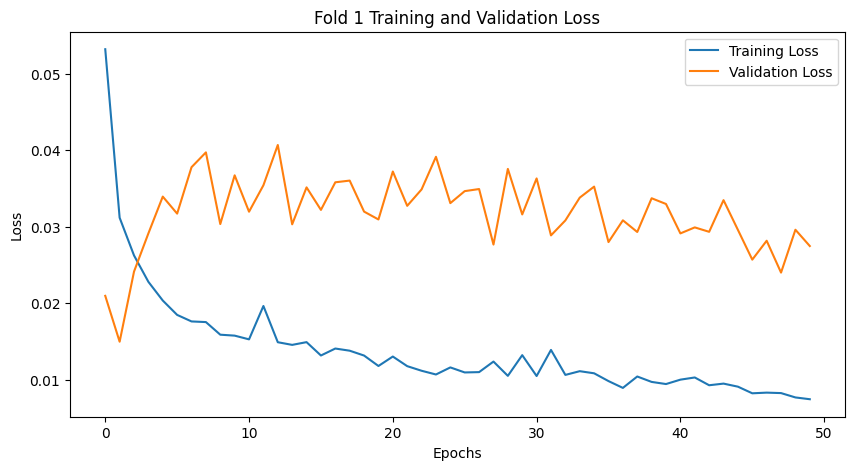

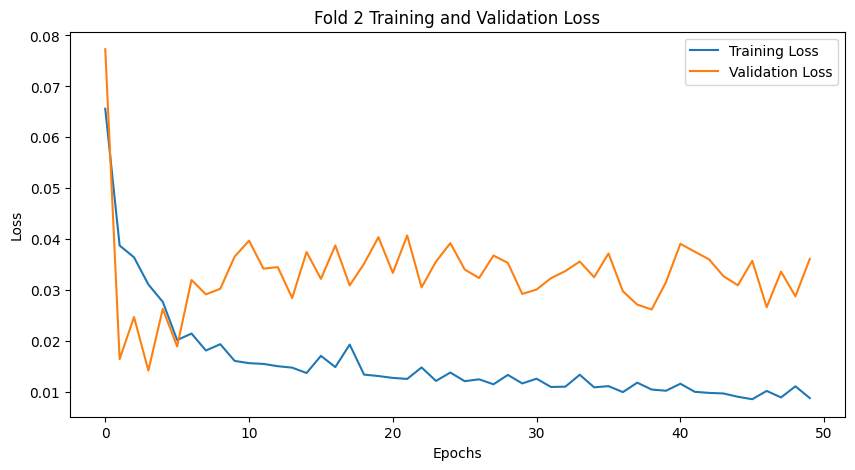

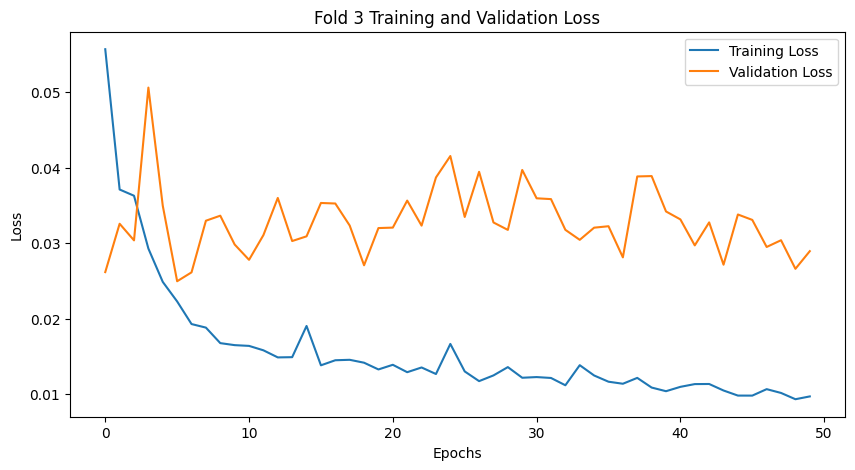

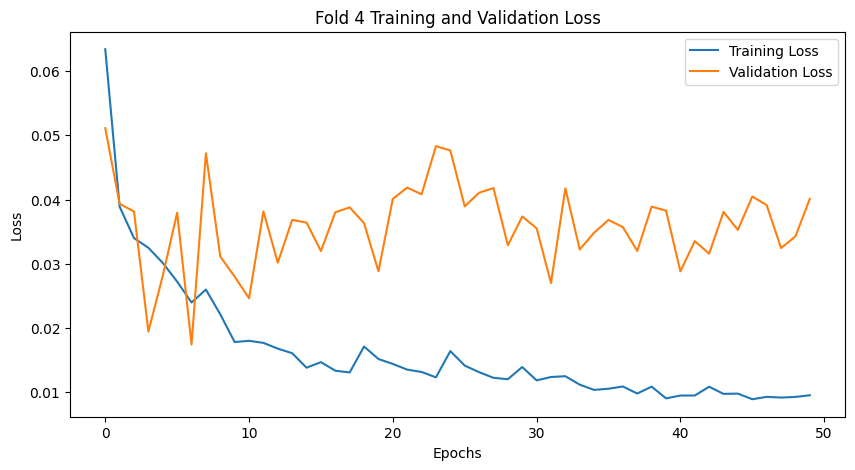

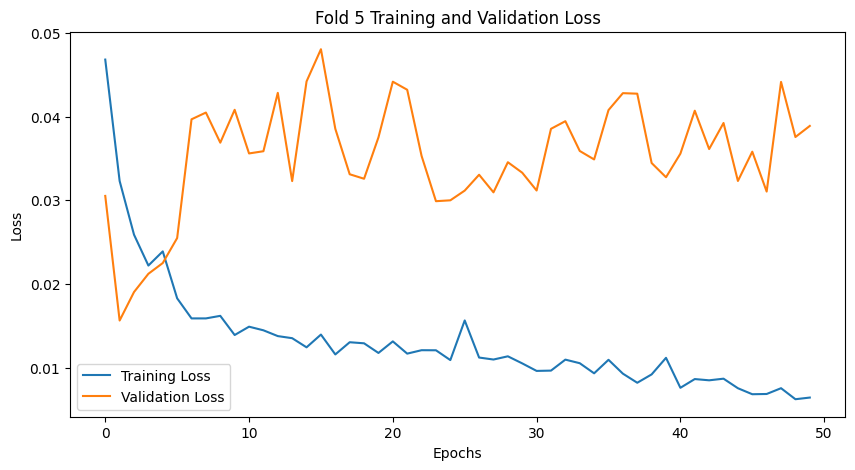

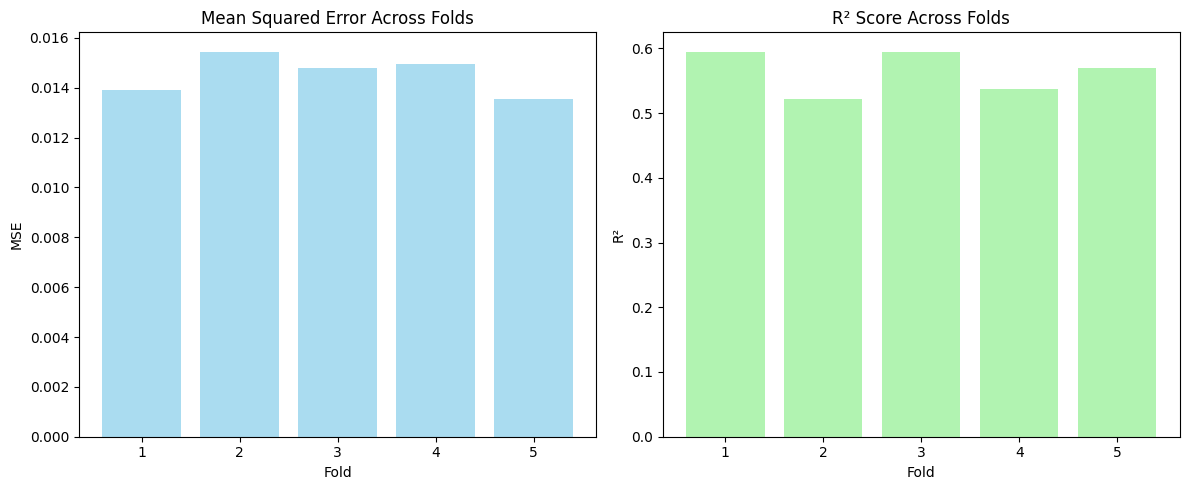

In [8]:
#cross_validation_lstm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Load and preprocess data
def load_and_preprocess_data(file_path, sequence_length=60):
    data = pd.read_csv(file_path)
    data = data.fillna(data.mean())  # Handle missing values
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']

    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Create sequences
    sequences = []
    seq_labels = []
    for i in range(len(X_scaled) - sequence_length):
        sequences.append(X_scaled[i:i + sequence_length])
        seq_labels.append(y.values[i + sequence_length])

    return np.array(sequences), np.array(seq_labels)

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Cross-validation with plotting for LSTM and train-test split visualization
def perform_cross_validation_with_plotting_lstm(X, y, k=5, epochs=50, batch_size=32):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_no = 1
    mse_scores = []
    r2_scores = []
    history_per_fold = []

    # Create plot for the train-test split
    fig, axs = plt.subplots(k, 1, figsize=(10, 3 * k))

    for fold_no, (train_index, test_index) in enumerate(kfold.split(X), 1):
        print(f"Training Fold {fold_no}...")

        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build model
        model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

        # Train model and capture history
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
        history_per_fold.append(history)

        # Evaluate model
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'Fold {fold_no} - MSE: {mse:.4f}, R2: {r2:.4f}')

        mse_scores.append(mse)
        r2_scores.append(r2)

        # Plot train-test split visualization
        ax = axs[fold_no - 1]
        ax.scatter(np.arange(len(y_train)), y_train, color='blue', label='Train', alpha=0.5)
        ax.scatter(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='red', label='Test', alpha=0.5)
        ax.set_title(f'Fold {fold_no} Train-Test Split')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('pIC50')
        ax.legend()

    # Print average results
    print("\nCross-Validation Results:")
    print(f"Average MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Average R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

    # Plot training and validation loss
    plot_training_history(history_per_fold)

    # Plot cross-validation scores
    plot_cross_validation_scores(mse_scores, r2_scores)

# Plot training and validation loss for LSTM
def plot_training_history(history_per_fold):
    for i, history in enumerate(history_per_fold, 1):
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Fold {i} Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Plot cross-validation scores for LSTM
def plot_cross_validation_scores(mse_scores, r2_scores):
    folds = range(1, len(mse_scores) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(folds, mse_scores, color='skyblue', alpha=0.7)
    plt.title('Mean Squared Error Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('MSE')

    plt.subplot(1, 2, 2)
    plt.bar(folds, r2_scores, color='lightgreen', alpha=0.7)
    plt.title('R² Score Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('R²')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with your dataset path
    sequence_length = 60
    X, y = load_and_preprocess_data(file_path, sequence_length)

    # Check shapes for debugging
    print(f"Data Shape: X={X.shape}, y={y.shape}")

    # Perform cross-validation with plotting for LSTM and train-test split visualization
    perform_cross_validation_with_plotting_lstm(X, y, k=5, epochs=50, batch_size=32)

if __name__ == "__main__":
    main()


Data Shape: X=(2106, 60, 489), y=(2106,)
Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 28s 454ms/step - loss: 0.1671 - mae: 0.2958 - val_loss: 0.0521 - val_mae: 0.2263
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 464ms/step - loss: 0.0353 - mae: 0.1529 - val_loss: 0.0304 - val_mae: 0.1710
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 426ms/step - loss: 0.0359 - mae: 0.1528 - val_loss: 0.0542 - val_mae: 0.2284
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 445ms/step - loss: 0.0350 - mae: 0.1503 - val_loss: 0.0451 - val_mae: 0.2059
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - loss: 0.0333 - mae: 0.1467 - val_loss: 0.0234 - val_mae: 0.1125
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 465ms/step - loss: 0.0287 - mae: 0.1349 - val_loss: 0.0290 - val_mae: 0.1208
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - loss: 0.0213 - mae: 0.1125 - val_loss: 0.0219 - val_mae: 0.1229
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 467ms/step - loss: 0.0199 - mae: 0.1097 - val_loss: 0.0218 - val_mae: 0.1082
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 436ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 30s 509ms/step - loss: 0.1642 - mae: 0.2898 - val_loss: 0.0704 - val_mae: 0.2622
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 447ms/step - loss: 0.0411 - mae: 0.1625 - val_loss: 0.0774 - val_mae: 0.2744
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 480ms/step - loss: 0.0404 - mae: 0.1629 - val_loss: 0.0406 - val_mae: 0.1992
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 440ms/step - loss: 0.0300 - mae: 0.1385 - val_loss: 0.0403 - val_mae: 0.1903
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 493ms/step - loss: 0.0311 - mae: 0.1399 - val_loss: 0.0233 - val_mae: 0.1294
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 442ms/step - loss: 0.0235 - mae: 0.1176 - val_loss: 0.0462 - val_mae: 0.1989
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 467ms/step - loss: 0.0252 - mae: 0.1195 - val_loss: 0.0460 - val_mae: 0.2009
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 443ms/step - loss: 0.0220 - mae: 0.1165 - val_loss: 0.0472 - val_mae: 0.1870
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 443ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 29s 467ms/step - loss: 0.1184 - mae: 0.2608 - val_loss: 0.0185 - val_mae: 0.1237
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 484ms/step - loss: 0.0421 - mae: 0.1656 - val_loss: 0.0178 - val_mae: 0.1202
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 437ms/step - loss: 0.0327 - mae: 0.1462 - val_loss: 0.0266 - val_mae: 0.1576
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - loss: 0.0338 - mae: 0.1497 - val_loss: 0.0693 - val_mae: 0.2596
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - loss: 0.0331 - mae: 0.1424 - val_loss: 0.0477 - val_mae: 0.2074
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 455ms/step - loss: 0.0265 - mae: 0.1244 - val_loss: 0.0392 - val_mae: 0.1813
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 443ms/step - loss: 0.0237 - mae: 0.1200 - val_loss: 0.0239 - val_mae: 0.1137
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 466ms/step - loss: 0.0212 - mae: 0.1105 - val_loss: 0.0278 - val_mae: 0.1420
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 440ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 30s 504ms/step - loss: 0.1430 - mae: 0.2802 - val_loss: 0.0554 - val_mae: 0.2334
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - loss: 0.0402 - mae: 0.1635 - val_loss: 0.0560 - val_mae: 0.2346
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 456ms/step - loss: 0.0425 - mae: 0.1660 - val_loss: 0.0236 - val_mae: 0.1477
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 443ms/step - loss: 0.0354 - mae: 0.1538 - val_loss: 0.0355 - val_mae: 0.1848
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 439ms/step - loss: 0.0307 - mae: 0.1418 - val_loss: 0.0280 - val_mae: 0.1254
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 483ms/step - loss: 0.0274 - mae: 0.1277 - val_loss: 0.0211 - val_mae: 0.1030
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 445ms/step - loss: 0.0201 - mae: 0.1078 - val_loss: 0.0214 - val_mae: 0.1067
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 499ms/step - loss: 0.0194 - mae: 0.1071 - val_loss: 0.0309 - val_mae: 0.1372
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 440ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 29s 454ms/step - loss: 0.1387 - mae: 0.2683 - val_loss: 0.0308 - val_mae: 0.1720
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 449ms/step - loss: 0.0399 - mae: 0.1609 - val_loss: 0.0321 - val_mae: 0.1761
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 431ms/step - loss: 0.0351 - mae: 0.1524 - val_loss: 0.0459 - val_mae: 0.2122
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - loss: 0.0345 - mae: 0.1483 - val_loss: 0.0247 - val_mae: 0.1359
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 426ms/step - loss: 0.0244 - mae: 0.1209 - val_loss: 0.0224 - val_mae: 0.1008
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 421ms/step - loss: 0.0209 - mae: 0.1121 - val_loss: 0.0206 - val_mae: 0.0966
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 472ms/step - loss: 0.0196 - mae: 0.1101 - val_loss: 0.0277 - val_mae: 0.1347
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 451ms/step - loss: 0.0194 - mae: 0.1058 - val_loss: 0.0310 - val_mae: 0.1194
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 432ms/

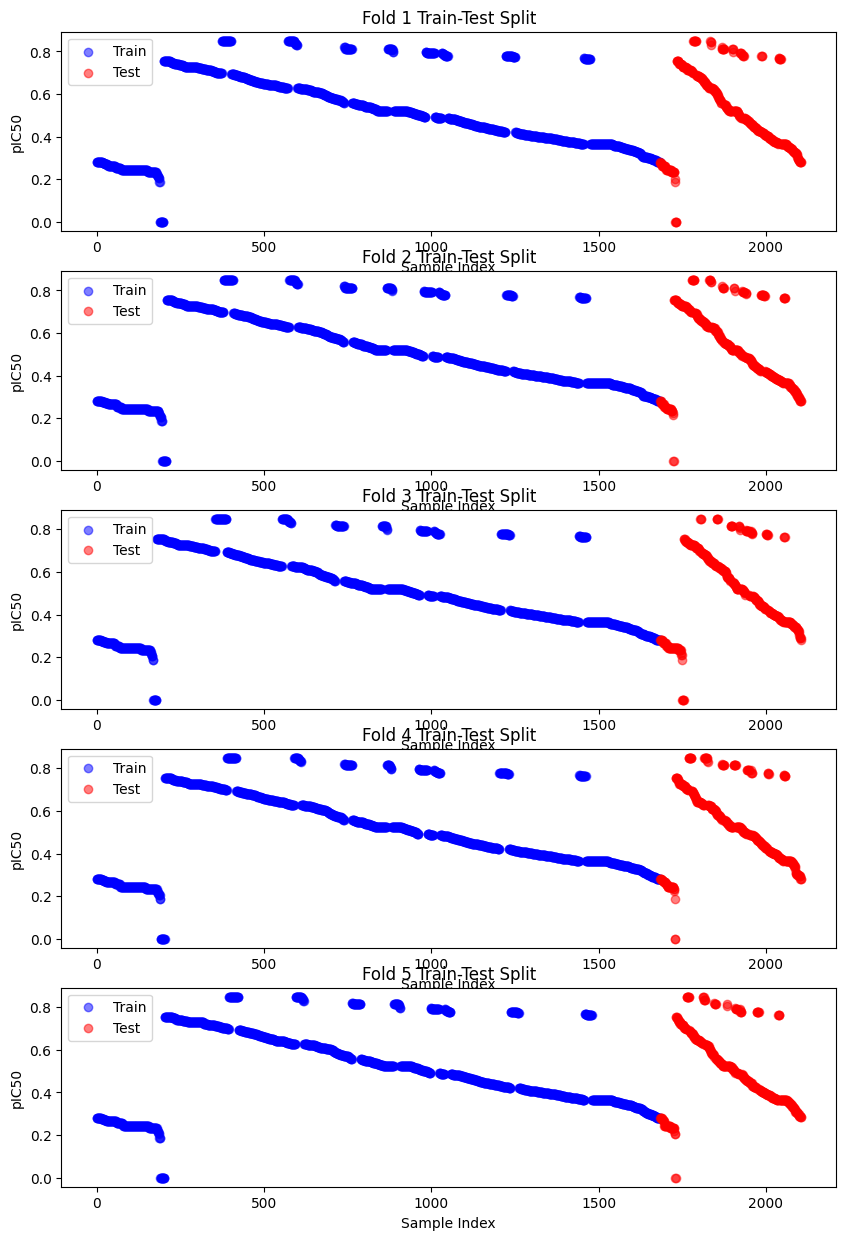

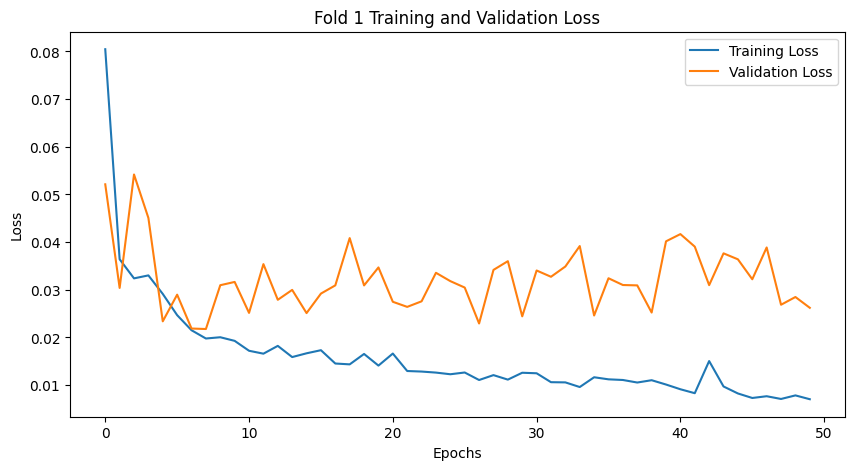

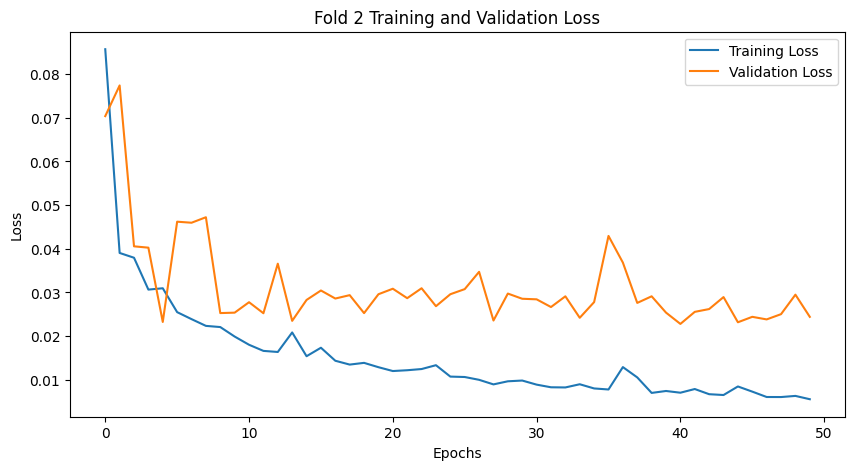

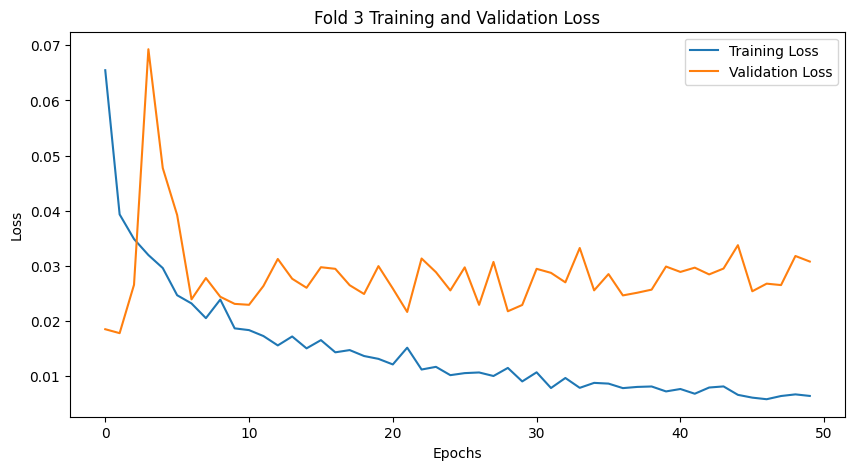

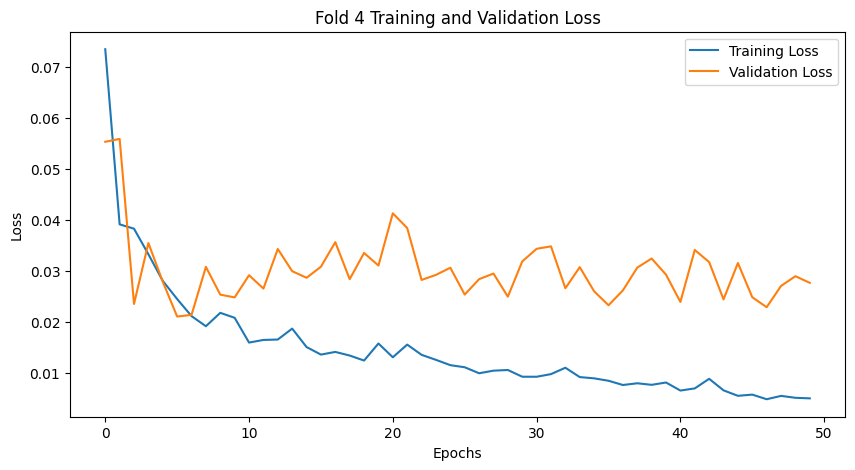

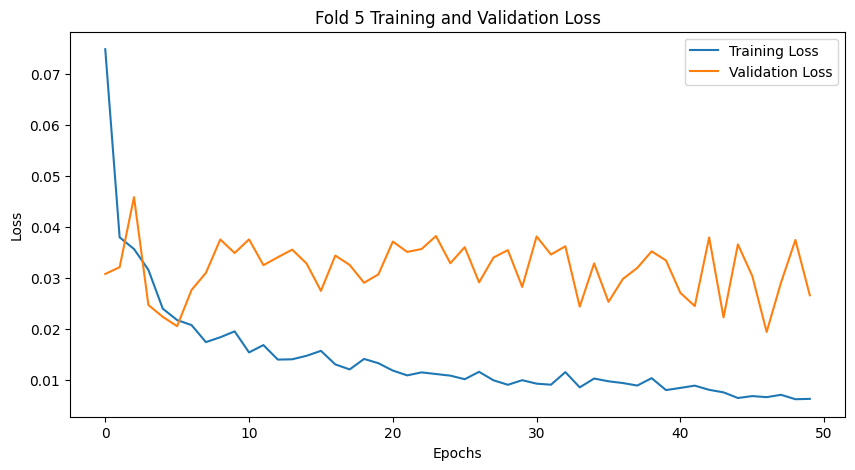

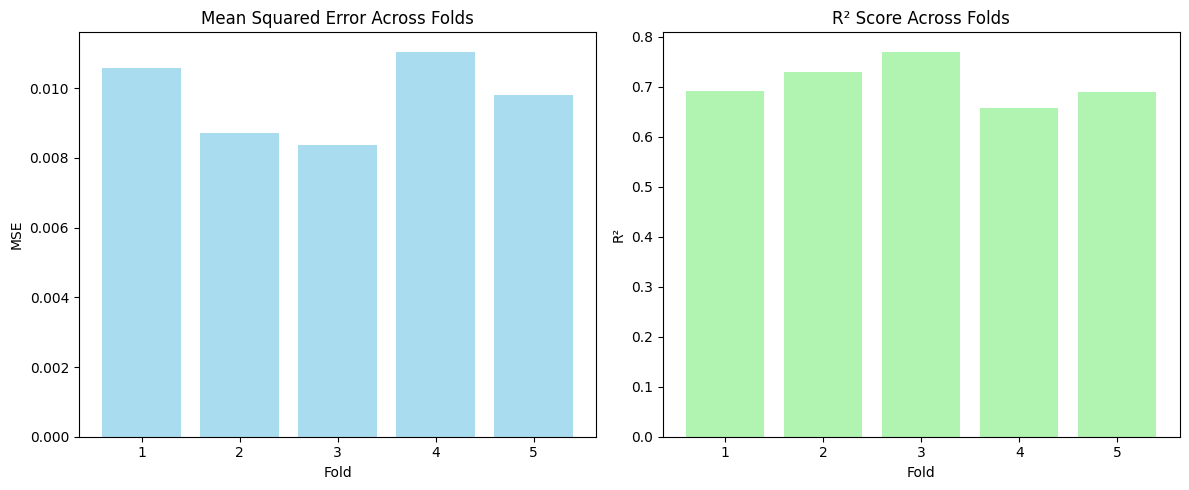

In [9]:
#bilstm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Load and preprocess data
def load_and_preprocess_data(file_path, sequence_length=60):
    data = pd.read_csv(file_path)
    data = data.fillna(data.mean())  # Handle missing values
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']

    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Create sequences
    sequences = []
    seq_labels = []
    for i in range(len(X_scaled) - sequence_length):
        sequences.append(X_scaled[i:i + sequence_length])
        seq_labels.append(y.values[i + sequence_length])

    return np.array(sequences), np.array(seq_labels)

# Build BiLSTM model
def build_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(64)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Cross-validation with plotting for BiLSTM and train-test split visualization
def perform_cross_validation_with_plotting_bilstm(X, y, k=5, epochs=50, batch_size=32):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_no = 1
    mse_scores = []
    r2_scores = []
    history_per_fold = []

    # Create plot for the train-test split
    fig, axs = plt.subplots(k, 1, figsize=(10, 3 * k))

    for fold_no, (train_index, test_index) in enumerate(kfold.split(X), 1):
        print(f"Training Fold {fold_no}...")

        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build model
        model = build_bilstm_model((X_train.shape[1], X_train.shape[2]))

        # Train model and capture history
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
        history_per_fold.append(history)

        # Evaluate model
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'Fold {fold_no} - MSE: {mse:.4f}, R2: {r2:.4f}')

        mse_scores.append(mse)
        r2_scores.append(r2)

        # Plot train-test split visualization
        ax = axs[fold_no - 1]
        ax.scatter(np.arange(len(y_train)), y_train, color='blue', label='Train', alpha=0.5)
        ax.scatter(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='red', label='Test', alpha=0.5)
        ax.set_title(f'Fold {fold_no} Train-Test Split')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('pIC50')
        ax.legend()

    # Print average results
    print("\nCross-Validation Results:")
    print(f"Average MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Average R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

    # Plot training and validation loss
    plot_training_history(history_per_fold)

    # Plot cross-validation scores
    plot_cross_validation_scores(mse_scores, r2_scores)

# Plot training and validation loss for BiLSTM
def plot_training_history(history_per_fold):
    for i, history in enumerate(history_per_fold, 1):
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Fold {i} Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Plot cross-validation scores for BiLSTM
def plot_cross_validation_scores(mse_scores, r2_scores):
    folds = range(1, len(mse_scores) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(folds, mse_scores, color='skyblue', alpha=0.7)
    plt.title('Mean Squared Error Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('MSE')

    plt.subplot(1, 2, 2)
    plt.bar(folds, r2_scores, color='lightgreen', alpha=0.7)
    plt.title('R² Score Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('R²')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with your dataset path
    sequence_length = 60
    X, y = load_and_preprocess_data(file_path, sequence_length)

    # Check shapes for debugging
    print(f"Data Shape: X={X.shape}, y={y.shape}")

    # Perform cross-validation with plotting for BiLSTM and train-test split visualization
    perform_cross_validation_with_plotting_bilstm(X, y, k=5, epochs=50, batch_size=32)

if __name__ == "__main__":
    main()


Data Shape: X=(2106, 60, 489), y=(2106,)
Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - loss: 0.2026 - mae: 0.3199 - val_loss: 0.0282 - val_mae: 0.1644
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - loss: 0.0471 - mae: 0.1773 - val_loss: 0.0323 - val_mae: 0.1772
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - loss: 0.0341 - mae: 0.1509 - val_loss: 0.0139 - val_mae: 0.0952
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0296 - mae: 0.1374 - val_loss: 0.0214 - val_mae: 0.1061
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 0.0231 - mae: 0.1173 - val_loss: 0.0322 - val_mae: 0.1388
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 0.0246 - mae: 0.1225 - val_loss: 0.0351 - val_mae: 0.1456
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0179 - mae: 0.1048 - val_loss: 0.0421 - val_mae: 0.1761
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - loss: 0.0177 - mae: 0.1010 - val_loss: 0.0385 - val_mae: 0.1558
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - loss: 0.1461 - mae: 0.2842 - val_loss: 0.0674 - val_mae: 0.2567
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 0.0465 - mae: 0.1729 - val_loss: 0.0175 - val_mae: 0.1165
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - loss: 0.0397 - mae: 0.1588 - val_loss: 0.0471 - val_mae: 0.1935
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - loss: 0.0268 - mae: 0.1267 - val_loss: 0.0349 - val_mae: 0.1526
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - loss: 0.0242 - mae: 0.1219 - val_loss: 0.0501 - val_mae: 0.1926
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - loss: 0.0204 - mae: 0.1103 - val_loss: 0.0386 - val_mae: 0.1658
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - loss: 0.0202 - mae: 0.1097 - val_loss: 0.0487 - val_mae: 0.1828
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - loss: 0.0188 - mae: 0.1054 - val_loss: 0.0404 - val_mae: 0.1624
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - loss: 0.1269 - mae: 0.2801 - val_loss: 0.0273 - val_mae: 0.1599
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 0.0398 - mae: 0.1593 - val_loss: 0.0212 - val_mae: 0.1267
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - loss: 0.0349 - mae: 0.1485 - val_loss: 0.0305 - val_mae: 0.1450
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - loss: 0.0276 - mae: 0.1331 - val_loss: 0.0349 - val_mae: 0.1509
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - loss: 0.0200 - mae: 0.1102 - val_loss: 0.0494 - val_mae: 0.1867
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - loss: 0.0206 - mae: 0.1083 - val_loss: 0.0502 - val_mae: 0.1872
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - loss: 0.0178 - mae: 0.1018 - val_loss: 0.0422 - val_mae: 0.1677
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - loss: 0.0158 - mae: 0.0972 - val_loss: 0.0519 - val_mae: 0.1958
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - loss: 0.1598 - mae: 0.3034 - val_loss: 0.0246 - val_mae: 0.1486
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - loss: 0.0427 - mae: 0.1676 - val_loss: 0.0191 - val_mae: 0.0977
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - loss: 0.0364 - mae: 0.1508 - val_loss: 0.0278 - val_mae: 0.1282
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0247 - mae: 0.1218 - val_loss: 0.0362 - val_mae: 0.1425
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0216 - mae: 0.1153 - val_loss: 0.0502 - val_mae: 0.1928
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0211 - mae: 0.1135 - val_loss: 0.0407 - val_mae: 0.1626
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - loss: 0.0171 - mae: 0.0994 - val_loss: 0.0524 - val_mae: 0.1995
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - loss: 0.0163 - mae: 0.0962 - val_loss: 0.0455 - val_mae: 0.1744
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - loss: 0.2154 - mae: 0.3366 - val_loss: 0.0159 - val_mae: 0.1112
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0449 - mae: 0.1698 - val_loss: 0.0259 - val_mae: 0.1563
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - loss: 0.0363 - mae: 0.1529 - val_loss: 0.0413 - val_mae: 0.1971
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 0.0326 - mae: 0.1441 - val_loss: 0.0235 - val_mae: 0.1161
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0257 - mae: 0.1253 - val_loss: 0.0538 - val_mae: 0.1987
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - loss: 0.0218 - mae: 0.1145 - val_loss: 0.0381 - val_mae: 0.1512
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - loss: 0.0170 - mae: 0.0990 - val_loss: 0.0588 - val_mae: 0.2081
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - loss: 0.0158 - mae: 0.0965 - val_loss: 0.0502 - val_mae: 0.1754
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step 

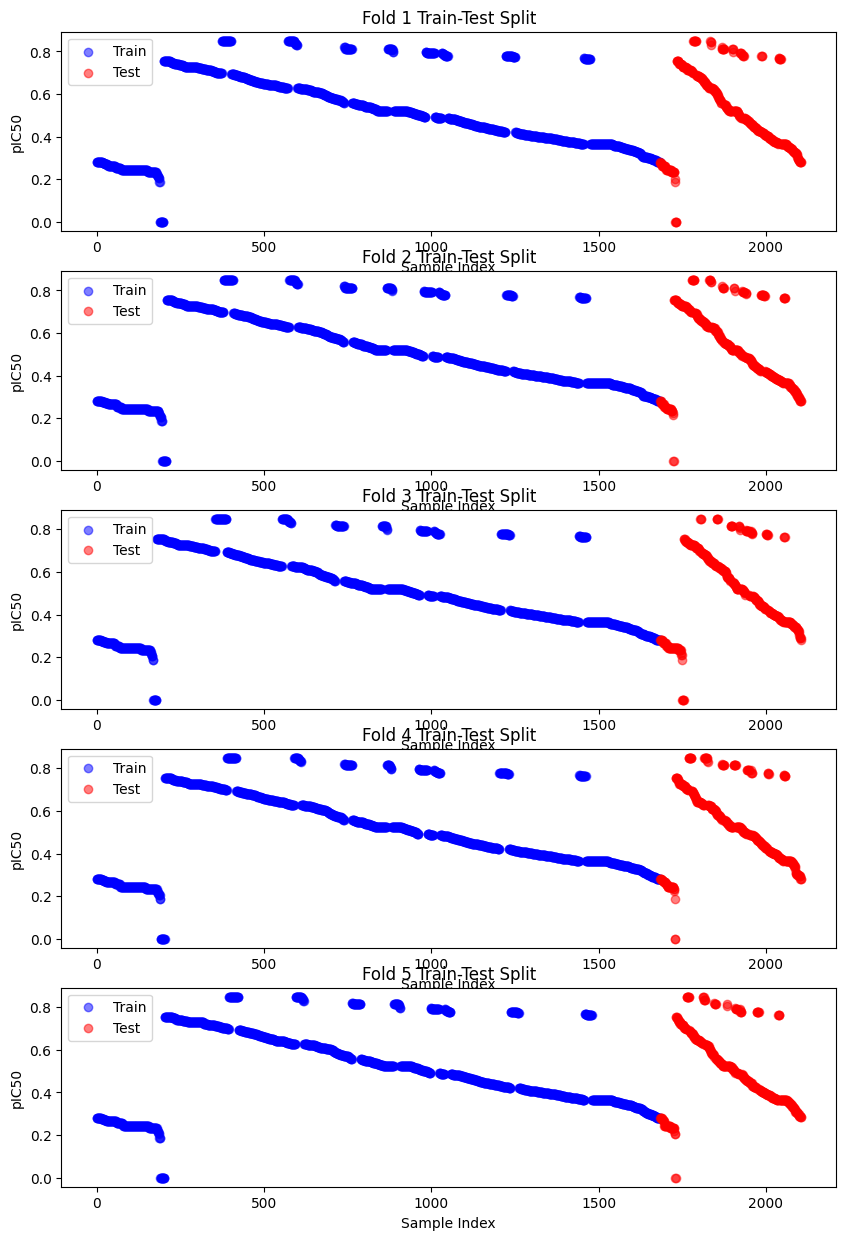

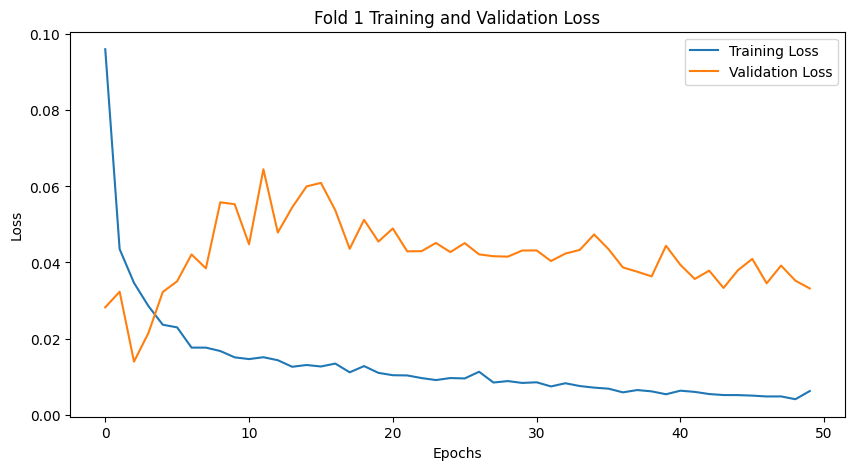

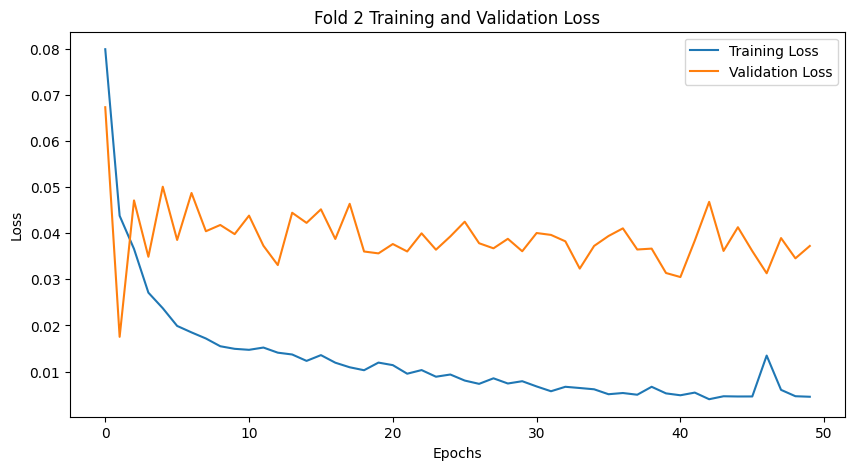

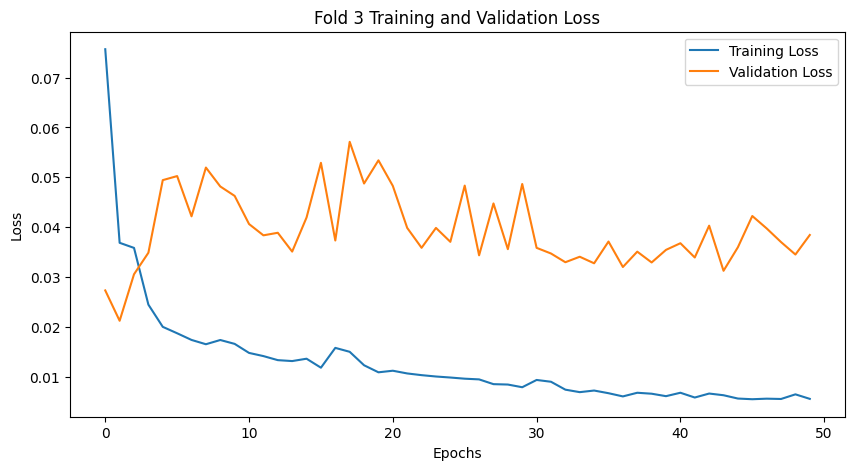

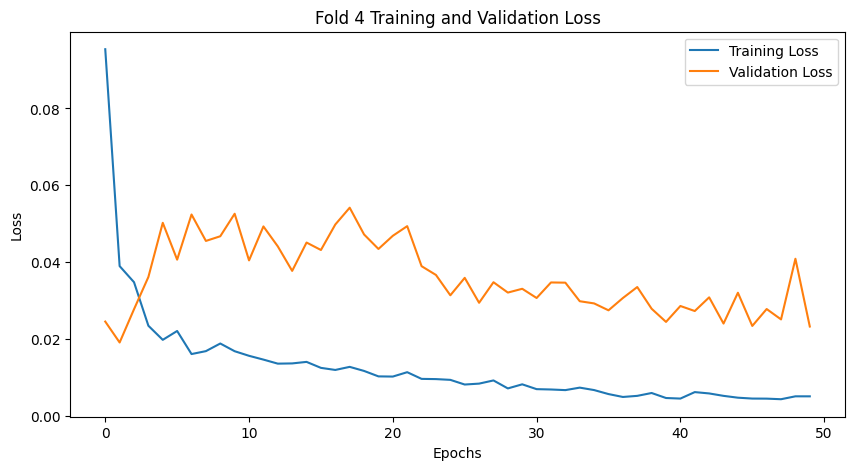

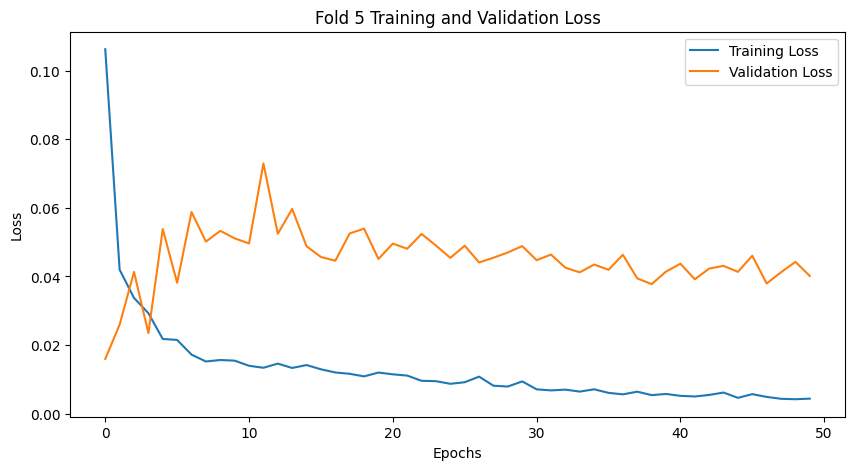

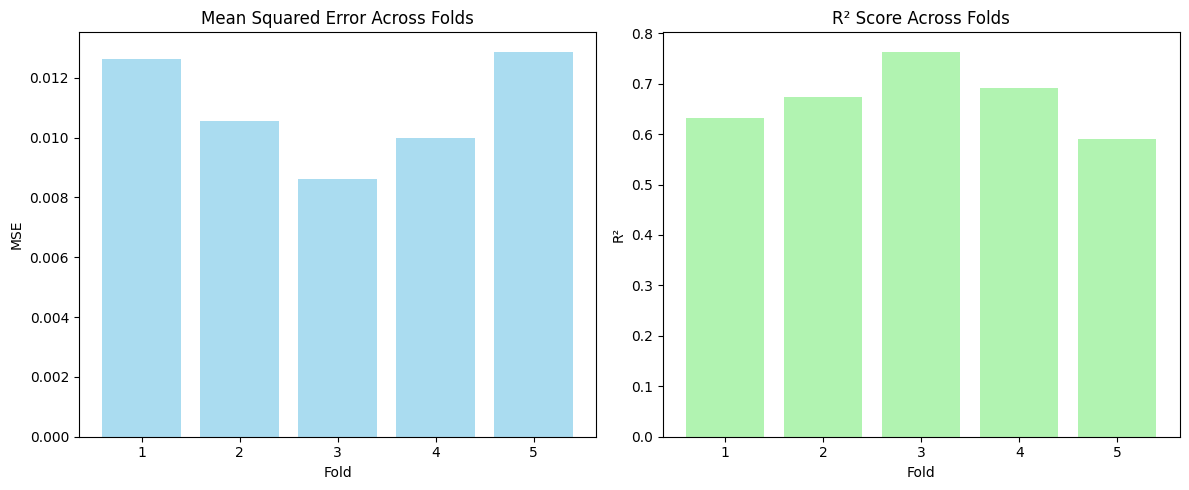

In [7]:
#GRU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Load and preprocess data
def load_and_preprocess_data(file_path, sequence_length=60):
    data = pd.read_csv(file_path)
    data = data.fillna(data.mean())  # Handle missing values
    X = data.drop(columns=['pIC50'])
    y = data['pIC50']

    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Create sequences
    sequences = []
    seq_labels = []
    for i in range(len(X_scaled) - sequence_length):
        sequences.append(X_scaled[i:i + sequence_length])
        seq_labels.append(y.values[i + sequence_length])

    return np.array(sequences), np.array(seq_labels)

# Build GRU model
def build_gru_model(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Predicting IC50
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Cross-validation with plotting for GRU and train-test split visualization
def perform_cross_validation_with_plotting_gru(X, y, k=5, epochs=50, batch_size=32):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_no = 1
    mse_scores = []
    r2_scores = []
    history_per_fold = []

    # Create plot for the train-test split
    fig, axs = plt.subplots(k, 1, figsize=(10, 3 * k))

    for fold_no, (train_index, test_index) in enumerate(kfold.split(X), 1):
        print(f"Training Fold {fold_no}...")

        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build model
        model = build_gru_model((X_train.shape[1], X_train.shape[2]))

        # Train model and capture history
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
        history_per_fold.append(history)

        # Evaluate model
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'Fold {fold_no} - MSE: {mse:.4f}, R2: {r2:.4f}')

        mse_scores.append(mse)
        r2_scores.append(r2)

        # Plot train-test split visualization
        ax = axs[fold_no - 1]
        ax.scatter(np.arange(len(y_train)), y_train, color='blue', label='Train', alpha=0.5)
        ax.scatter(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='red', label='Test', alpha=0.5)
        ax.set_title(f'Fold {fold_no} Train-Test Split')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('pIC50')
        ax.legend()

    # Print average results
    print("\nCross-Validation Results:")
    print(f"Average MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
    print(f"Average R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

    # Plot training and validation loss
    plot_training_history(history_per_fold)

    # Plot cross-validation scores
    plot_cross_validation_scores(mse_scores, r2_scores)

# Plot training and validation loss for GRU
def plot_training_history(history_per_fold):
    for i, history in enumerate(history_per_fold, 1):
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Fold {i} Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Plot cross-validation scores for GRU
def plot_cross_validation_scores(mse_scores, r2_scores):
    folds = range(1, len(mse_scores) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(folds, mse_scores, color='skyblue', alpha=0.7)
    plt.title('Mean Squared Error Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('MSE')

    plt.subplot(1, 2, 2)
    plt.bar(folds, r2_scores, color='lightgreen', alpha=0.7)
    plt.title('R² Score Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('R²')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    file_path = '/content/NEW_TRAINING.csv'  # Replace with your dataset path
    sequence_length = 60
    X, y = load_and_preprocess_data(file_path, sequence_length)

    # Check shapes for debugging
    print(f"Data Shape: X={X.shape}, y={y.shape}")

    # Perform cross-validation with plotting for GRU and train-test split visualization
    perform_cross_validation_with_plotting_gru(X, y, k=5, epochs=50, batch_size=32)

if __name__ == "__main__":
    main()


In [ ]:


import pandas as pd
data=pd.read_csv("/content/NEW_TRAINING.csv")


In [ ]:
# Print the first row of the dataset
print(data.iloc[0])


ALogP     6.542682e-01
ALogp2    1.197968e-02
AMR       2.731784e-01
apol      2.824475e-01
nAtom     3.012048e-01
              ...     
WTPT-3    2.150615e-01
WPATH     3.920000e-09
XLogP     2.618050e-01
Zagreb    3.070175e-01
pIC50     1.000000e+00
Name: 0, Length: 490, dtype: float64


In [ ]:
# Print only the column names, one per line
for column in data.columns:
    print(column)


ALogP
ALogp2
AMR
apol
nAtom
nHeavyAtom
ATS0m
ATS1m
ATS2m
ATS0v
ATS1v
ATS2v
ATS0e
ATS1e
ATS2e
ATS0p
ATS1p
ATS2p
ATS0i
ATS1i
ATS2i
ATS0s
ATS1s
ATS2s
AATS0m
AATS1m
AATS2m
AATS0v
AATS1v
AATS2v
AATS0e
AATS1e
AATS2e
AATS0p
AATS1p
AATS2p
AATS0i
AATS1i
AATS2i
AATS0s
AATS1s
AATS2s
ATSC0c
ATSC1c
ATSC2c
ATSC0m
ATSC1m
ATSC2m
ATSC0v
ATSC1v
ATSC2v
ATSC0e
ATSC1e
ATSC2e
ATSC0p
ATSC1p
ATSC2p
ATSC0i
ATSC1i
ATSC2i
ATSC0s
ATSC1s
ATSC2s
AATSC0c
AATSC1c
AATSC2c
AATSC0m
AATSC1m
AATSC2m
AATSC0v
AATSC1v
AATSC2v
AATSC0e
AATSC1e
AATSC2e
AATSC0p
AATSC1p
AATSC2p
AATSC0i
AATSC1i
AATSC2i
AATSC0s
AATSC1s
AATSC2s
MATS1c
MATS2c
MATS1m
MATS2m
MATS1v
MATS2v
MATS1e
MATS2e
MATS1p
MATS2p
MATS1i
MATS2i
GATS1c
GATS1m
GATS1v
GATS1e
GATS1p
GATS1i
SpAbs_DzZ
SpMax_DzZ
SpDiam_DzZ
SpAD_DzZ
SpMAD_DzZ
EE_DzZ
SM1_DzZ
VR1_DzZ
VR2_DzZ
VR3_DzZ
SpAbs_Dzm
SpMax_Dzm
SpDiam_Dzm
SpAD_Dzm
SpMAD_Dzm
EE_Dzm
SM1_Dzm
VE1_Dzm
VE2_Dzm
VE3_Dzm
VR1_Dzm
VR2_Dzm
VR3_Dzm
SpAbs_Dzv
SpMax_Dzv
SpDiam_Dzv
SpAD_Dzv
SpMAD_Dzv
EE_Dzv
SM1_Dzv
VE1_Dzv
VE2_Dzv
VE3

In [ ]:
test_data=pd.read_csv("/content/cleaned_testing.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the test data
test_data = pd.read_csv("/content/cleaned_testing.csv")

# Replace infinite values with NaN
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of each column
test_data = test_data.fillna(test_data.mean())

# Initialize StandardScaler
ss = StandardScaler()

# Before applying StandardScaler, check for and handle infinite values
# This step is crucial to prevent the ValueError
for col in test_data.columns:
    if test_data[col].isin([np.inf, -np.inf]).any():
        # Handle infinite values (e.g., replace with a large finite number, median, etc.)
        # Here, we replace with a large finite number as an example
        max_finite = test_data[col][np.isfinite(test_data[col])].max()
        test_data[col].replace([np.inf, -np.inf], max_finite, inplace=True)

# Apply StandardScaler to the cleaned data
ss_test = pd.DataFrame(ss.fit_transform(test_data), columns=test_data.columns)

# Display the scaled data
print(ss_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-12-94e2812b3cfd>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].replace([np.inf, -np.inf], max_finite, inplace=True)


        nAcid     ALogP    ALogp2       AMR      apol  naAromAtom  nAromBond  \
0    0.172854  0.495547 -0.082743 -0.164176 -0.436578   -0.797482  -0.797482   
1    0.172854  1.120667  0.973242 -0.168769 -0.321812   -0.797482  -0.797482   
2    0.172854  0.495547 -0.082743 -0.164176 -0.190334   -0.797482  -0.797482   
3    0.172854  0.495547 -0.082743 -0.164176 -0.436578   -0.797482  -0.797482   
4    0.172854  0.495547 -0.082743 -0.164176 -0.436578   -0.797482  -0.797482   
..        ...       ...       ...       ...       ...         ...        ...   
504  0.172854 -0.026214 -0.623464  0.163188  0.037085   -0.797482  -0.797482   
505  0.172854 -0.656209 -0.863268 -0.330808 -0.498096   -0.797482  -0.797482   
506  0.172854  1.097146  0.925454  3.938950  3.040616   -0.797482  -0.797482   
507 -2.083116  0.687634  0.194387  0.615058  0.858680   -0.797482  -0.797482   
508  0.172854 -2.430504  0.889930 -0.573840 -0.105500   -0.797482  -0.797482   

        nAtom  nHeavyAtom        nH  ..

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
#GRU
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load molecular descriptor data (without pIC50)
def load_descriptor_data(file_path):
    data = pd.read_csv(file_path)

    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())

    # Check for infinite values and replace them with a large finite number
    data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Check for NaN values again after replacing infinities
    if data.isnull().values.any():
        data = data.fillna(data.mean())  # Refill NaNs after replacing infinities

    return data  # Only return the descriptors (no 'pIC50' column)

# Normalize data
def normalize_data(X, scaler=None):
    # Handle extreme values by clipping data before normalization
    X = np.clip(X, -1e10, 1e10)  # Set a threshold for large values

    if scaler is None:
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)

    return X_scaled, scaler

# Create sequences for GRU
def create_sequences(data, sequence_length=60):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])  # Create sequences
    return np.array(sequences)

# Predict using the trained GRU model
def predict(model, X_input, sequence_length=60):
    # Prepare input data (Normalize and reshape)
    X_scaled, scaler = normalize_data(X_input)

    # Create sequences (X_scaled should be of shape (samples, features))
    X_seq = create_sequences(X_scaled, sequence_length)

    # Ensure correct shape: (batch_size, sequence_length, num_features)
    if X_seq.shape[2] != 489:
        # If the number of features is not 489, remove or adjust accordingly
        X_seq = X_seq[:, :, :-1]  # Example: remove the last column if there are extra features

    print("Shape of input data before prediction:", X_seq.shape)  # Check shape

    # Make predictions
    predictions = model.predict(X_seq)

    return predictions

# Main function for prediction
def main():
    file_path = '/content/NEW_TEST_DATA.csv'  # Replace with your new test data path
    model_path = 'gru_ic50_prediction_model.h5'  # Replace with the saved GRU model path

    # Load new data (descriptors only)
    X_new = load_descriptor_data(file_path)

    # Check if the number of features is correct (489)
    print("Shape of test data:", X_new.shape)

    # If necessary, remove extra features
    if X_new.shape[1] == 490:  # Check if there are 490 features
        X_new = X_new.iloc[:, :-1]  # Remove the last column if it is extra

    # Load the trained GRU model
    model = load_model(model_path)

    # Predict on the new data
    predictions = predict(model, X_new)

    # Print or save predictions
    print("Predictions:", predictions)

    # If you want to save the predictions to a CSV file:
    pd.DataFrame(predictions, columns=['Predicted_pIC50']).to_csv('gru_predictions.csv', index=False)

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load molecular descriptor data (without pIC50)
def load_descriptor_data(file_path, expected_features=489):
    data = pd.read_csv(file_path)

    # Fill NaN values with the mean of the respective column
    data = data.fillna(data.mean())

    # Check for infinite values and replace them with a large finite number
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data = data.fillna(data.mean())  # Refill NaNs after replacing infinities

    # Adjust the number of features if necessary
    if data.shape[1] > expected_features:
        data = data.iloc[:, :expected_features]  # Keep only the first `expected_features` columns
    elif data.shape[1] < expected_features:
        raise ValueError(f"Input data has fewer features ({data.shape[1]}) than expected ({expected_features}).")

    return data

# Normalize data
def normalize_data(X, scaler=None):
    X = np.clip(X, -1e10, 1e10)  # Clip extreme values

    if scaler is None:
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)

    return X_scaled, scaler

# Create sequences for LSTM
def create_sequences(data, sequence_length=60):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])  # Create sequences
    return np.array(sequences)

# Predict using the trained LSTM model
def predict(model, X_input, sequence_length=60):
    # Normalize and reshape input data
    X_scaled, scaler = normalize_data(X_input)

    # Create sequences
    X_seq = create_sequences(X_scaled, sequence_length)

    # Ensure the correct shape: (batch_size, sequence_length, num_features)
    if X_seq.shape[2] != 489:
        raise ValueError(f"Input data features ({X_seq.shape[2]}) do not match the model's expected features (489).")

    print("Shape of input data before prediction:", X_seq.shape)

    # Make predictions
    predictions = model.predict(X_seq)

    return predictions

# Main function for prediction
def main():
    file_path = '/content/cleaned_testing.csv'  # Replace with your test data path
    model_path = '/content/ic50_prediction_model.h5'  # Replace with the saved model path

    # Load test data
    X_new = load_descriptor_data(file_path, expected_features=489)

    print("Shape of test data:", X_new.shape)

    # Load the trained model
    model = load_model(model_path)

    # Predict on the new data
    predictions = predict(model, X_new)

    # Save predictions
    pd.DataFrame(predictions, columns=['Predicted_pIC50']).to_csv('predictions.csv', index=False)
    print("Predictions saved to 'predictions.csv'.")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Shape of test data: (509, 489)
Shape of input data before prediction: (449, 60, 489)
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step
Predictions saved to 'predictions.csv'.
